In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

feature_generator_kargs = {
    "operations" : [add, sub, mul, div, hyp, log],
    "operation_names" : ["+", "-", "*", "/", "hyp", "log"],
    "popsize" : 120,
    "maxiter" : 200,
    "mutation_rate" : 0.05,
    "max_tree_depth" : 8,
}

In [4]:
dataset = pd.read_csv("csv/winequality-red.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
tester = tester(X, y, feature_generator_kargs, 8, 1, 400, verbose = True, test_size = 0.3)

In [6]:
tester.test_models(notests=30, nodatatests=3)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.27390171188569934 Generation best 0.27315170719816995
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.27382671141694637 Generation best 0.24628278926743297
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.277914236963981 Generation best 0.199932499578122353
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.2674704216901356 Generation best 0.22925768286051784
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.2815330095813099 Generation best 0.24662029137682107
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.2617703860649129 Generation best 0.21542009637560233
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.2953518459490372 Generation best 0.27562672266701677
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.2649579059869124 Generation best 0.24249526559541001
Iteration 4 - MSE 0.5810507113568099, R2 0.43676105990534286, MAE 0.5652914509281229, NEW_MSE 0.5798520677687372, NEW_R2 0.43792295977

In [7]:
import os

# create forlder insuranse

if not os.path.exists("results/winequality"):
    os.makedirs("results/winequality")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/winequality/" + key + ".csv")

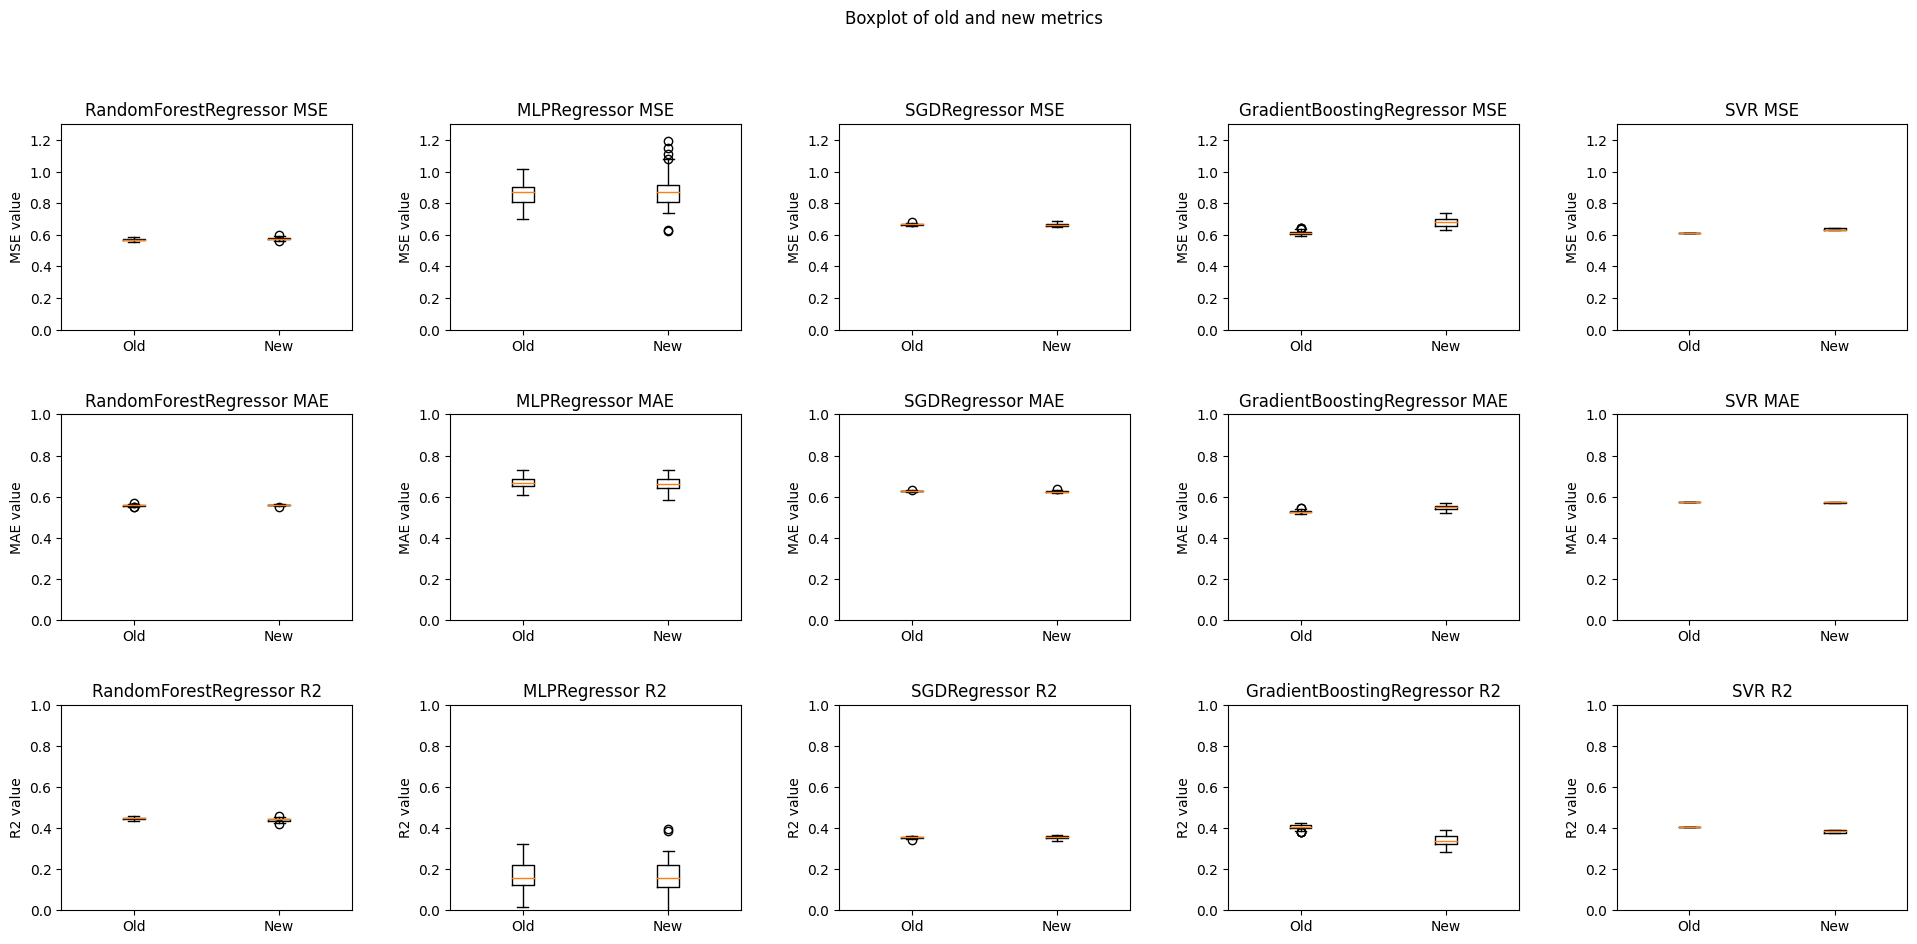

In [13]:
tests = tester.get_individual_tests()
mses = pd.DataFrame(columns = tests.keys())
maes = pd.DataFrame(columns = tests.keys())
r2s = pd.DataFrame(columns = tests.keys())
new_mses = pd.DataFrame(columns = tests.keys())
new_maes = pd.DataFrame(columns = tests.keys())
new_r2s = pd.DataFrame(columns = tests.keys())

for key in tests.keys():
    mses[key] = tests[key]["MSE"]
    maes[key] = tests[key]["MAE"]
    r2s[key] = tests[key]["R2"]
    new_mses[key] = tests[key]["NEW_MSE"]
    new_maes[key] = tests[key]["NEW_MAE"]
    new_r2s[key] = tests[key]["NEW_R2"]

NO_MODELS = len(tests.keys())
model_names = [i for i in tests.keys()]
NO_STATS = 3


fig, axs = plt.subplots(NO_STATS, NO_MODELS, figsize=(20, 10))
fig.suptitle('Boxplot of old and new metrics')

# add padding
fig.tight_layout(pad=4.0)

for i in range(NO_MODELS):
    axs[0, i].boxplot([mses.iloc[:, i], new_mses.iloc[:, i]])
    axs[0, i].set_title(model_names[i] + ' MSE')
    axs[0, i].set_xticklabels(['Old', 'New'])
    axs[0, i].set(ylabel='MSE value')
    # set mse y range between 0 and 62000
    axs[0, i].set_yscale('linear')
    axs[0, i].set_ylim(0, 1.3)

    axs[1, i].boxplot([maes.iloc[:, i], new_maes.iloc[:, i]])
    axs[1, i].set_title(model_names[i] + ' MAE')
    axs[1, i].set_xticklabels(['Old', 'New'])
    axs[1, i].set(ylabel='MAE value')

    # set mae y range between 0 and 80 in log scale
    axs[1, i].set_yscale('linear')
    axs[1, i].set_ylim(0, 1)


    axs[2, i].boxplot([r2s.iloc[:, i], new_r2s.iloc[:, i]])
    axs[2, i].set_title(model_names[i] + ' R2')
    axs[2, i].set_xticklabels(['Old', 'New'])
    axs[2, i].set(ylabel='R2 value')
    # set r2 y range between -0.3 and 1 and linear scale
    axs[2, i].set_yscale('linear')
    axs[2, i].set_ylim(0, 1)

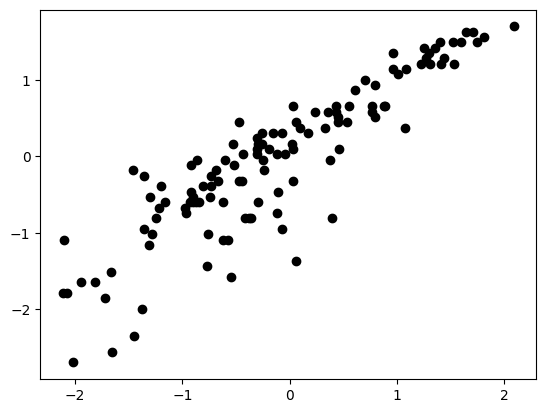

Min:  -2.1159691315389177 Max:  2.090878515100839 Mean:  -0.13079569447551312 Std:  1.001763651776131


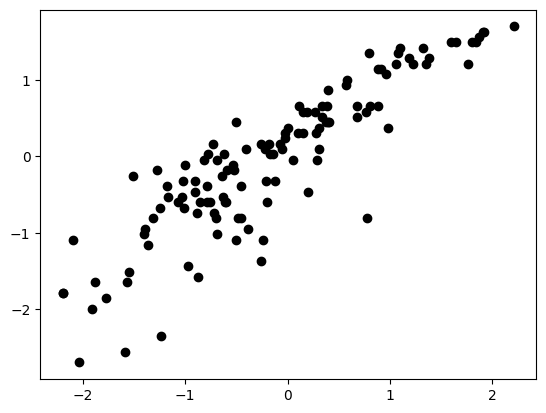

Min:  -2.1936957354064277 Max:  2.207790007166813 Mean:  -0.15281931108773236 Std:  1.0123984400015118


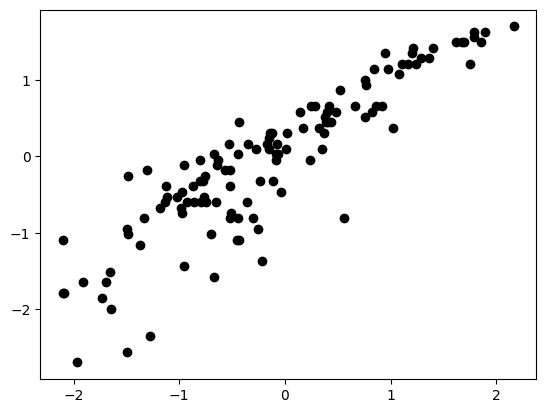

Min:  -2.1026724008911475 Max:  2.1651522226324795 Mean:  -0.13703238669538537 Std:  1.0114992334026043


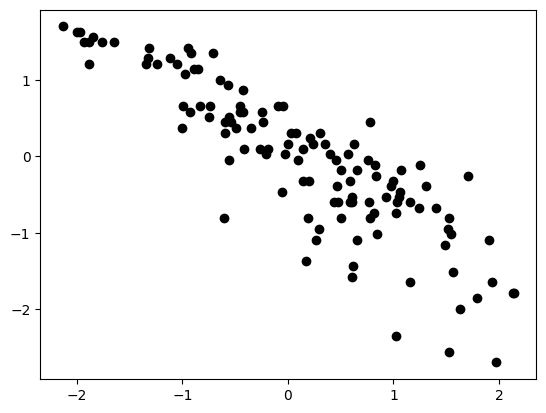

Min:  -2.1344314545300396 Max:  2.1390934048411108 Mean:  0.12874861886351213 Std:  1.0262602786738761


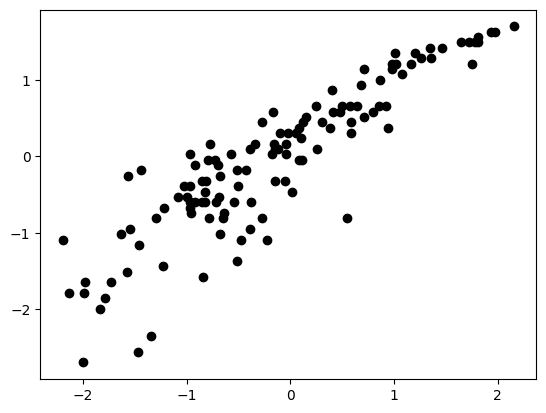

Min:  -2.194884822498527 Max:  2.1553642822373367 Mean:  -0.15339870760686214 Std:  1.0302631362083439


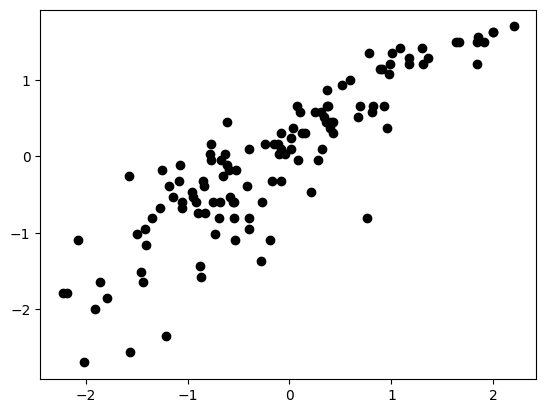

Min:  -2.2240499013690567 Max:  2.1990300254466457 Mean:  -0.14753513156886205 Std:  1.0176235815348342


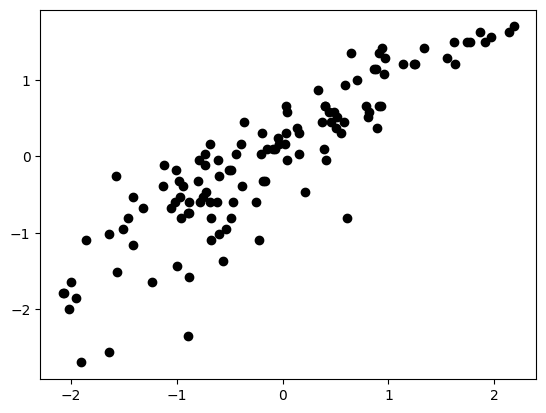

Min:  -2.074562867803282 Max:  2.1820895747690643 Mean:  -0.13881601957695758 Std:  1.0226936645814009


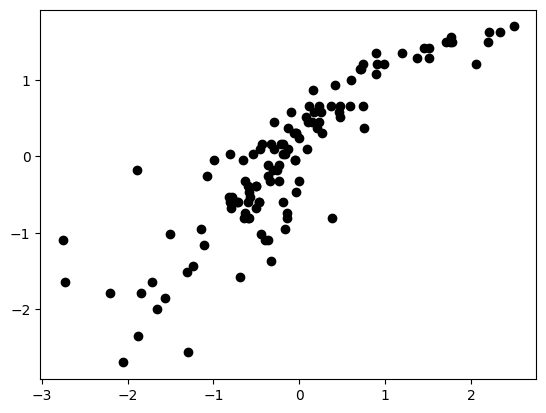

Min:  -2.755225643038311 Max:  2.4958538527315204 Mean:  -0.11872430673172256 Std:  1.0045783442310254


In [18]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())